In [2]:
!pip install plotly

     |████████████████████████████████| 25.3 MB 70 kB/s            


In [3]:
import os
import sys
import subprocess

from qiime2 import Artifact, Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats

%matplotlib inline

In [5]:
data = Artifact.load("tax_table.qza").view(pd.DataFrame)

#convert to relative abundances
data_mat = np.matrix(data)
data_mat /= np.sum(data_mat, axis=1)
data = pd.DataFrame(data_mat, index=data.index, columns=data.columns)

metadata = pd.read_csv("metadata.txt", sep="\t", index_col="SampleID")

In [7]:
metadata.columns

Index(['Race', 'HIV', 'AGE', 'BMI', 'Hip_to_Waist', 'Fibroscan', 'Fibroscan_2',
       'Acetate', 'Propionate', 'Isobutyrate', 'Butyrate', 'Isovalerate',
       'Valerate', 'Isocaptoate', 'Caproate', 'Treatment'],
      dtype='object')

In [9]:
lipids = metadata.loc[:,['HIV',
                         'Acetate', 'Propionate', 'Isobutyrate', 
                         'Butyrate', 'Isovalerate','Valerate', 
                         'Isocaptoate', 'Caproate']]

In [21]:
lipids_z = lipids.drop("HIV", axis=1).apply(stats.zscore)
lipids_z["HIV"] = lipids["HIV"]

In [28]:
grouped_lipids_z = lipids_z.groupby("HIV").mean().reset_index()

In [29]:
grouped_lipids_z

,HIV,Acetate,Propionate,Isobutyrate,Butyrate,Isovalerate,Valerate,Isocaptoate,Caproate
0,No,0.426925,0.168018,-0.068845,0.471310,-0.081283,-0.007250,0.166020,0.211305
1,Yes,-0.406595,-0.160017,0.065567,-0.448867,0.077412,0.006905,-0.158114,-0.201243


In [33]:
melted_lipids_z = pd.melt(grouped_lipids_z, id_vars="HIV")
fig = px.line_polar(melted_lipids_z,
                    r="value",
                    theta="variable",
                    color="HIV",
                    line_close=True,
                    title="Z Scores of Short Chain Fatty Acids")
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, 1]
    )))
fig.show()

In [37]:
main_lipids_z_grouped = grouped_lipids_z.loc[:,["Acetate", "Propionate", 
                                                "Butyrate", "Valerate",
                                                "Caproate", "HIV"]]
fig = px.line_polar(pd.melt(main_lipids_z_grouped, id_vars="HIV"),
                    r="value",
                    theta="variable",
                    color="HIV",
                    line_close=True,
                    title="Z Scores of Dominant Short Chain Fatty Acids")
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, 1]
    )))
fig.show()

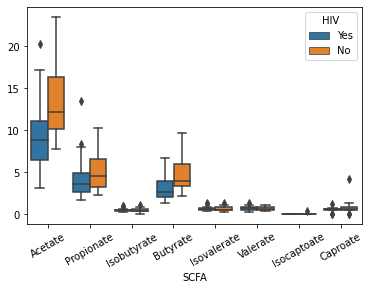

In [43]:
melted_lipids = pd.melt(lipids,
                       id_vars="HIV")
ax = sns.boxplot(x="variable", y="value", hue="HIV", 
                 data=melted_lipids)
ax.set_xlabel("SCFA")
plt.xticks(rotation=30)
ax.set_ylabel("")
plt.show()